In [1]:
#imoport some packages to use 
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 


#To see our directory 
import os 
import random 
import gc #Gabage collector for cleanning data from memory 
from skimage import io, data_dir


from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import Dense
import pandas as pd


from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


# Inception V3

In [2]:
inception_v3_model = InceptionV3(weights='imagenet', include_top=False)

x = inception_v3_model.output
x= GlobalAveragePooling2D()(x) #  GlobalAveragePooling2D 将 MxNxC 的张量转换成 1xC 张量，C是通道数
x = Dense(1024, activation='relu')(x)

#predictions = Dense(17, activation='softmax')(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=inception_v3_model.input, outputs=predictions)
# plot_model(model, 't1mode.png')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (

In [3]:
from keras.optimizers import Adam, RMSprop, SGD

def setup_to_transfer_learning(model, base_model):
    """
    In this method set base_model each layer not trainable.
    """
    for layer in base_model.layers:
        layer.trainable = False
   # sgd = SGD(lr=0.0001)
    #model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    #sgd = SGD(lr=1e-4, decay=1e-6, momentum=0.9, nesterov=True)
    #model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    adam = Adam(lr=1e-6)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
def setup_to_fine_tune(model, base_model):
    GAP_LAYER=17
    for layer in base_model.layers[:GAP_LAYER+1]:
        layer.trainable = True

    for layer in base_model.layers[GAP_LAYER+1:]:
        layer.trainable = True

   # model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    #adm =Adam(lr=0.0001) 
   # adam = Adam(lr=1e-6)
    #sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9,nesterov=True)
    adam = Adam(lr=0.001)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


   # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [11]:
from keras.optimizers import Adam, RMSprop, SGD



def setup_to_fine_tune1(model, base_model):
    GAP_LAYER=17
    for layer in base_model.layers[:GAP_LAYER+1]:
        layer.trainable = False

    for layer in base_model.layers[GAP_LAYER+1:]:
        layer.trainable = True

   # model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    #adm =Adam(lr=0.0001) 
   # adam = Adam(lr=1e-6)
    #sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9,nesterov=True)
    adam = Adam(lr=0.001)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

image labelling 

In [4]:
# A function to read and process the images to an acceptable format for our model 
def read_and_process_images(list_of_images):
    #Returns one array
   
    #y is an array of labels
   
    y = [] # labels
    for image in list_of_images:
       
    
        if 'bathroom'  in image:
            if 'new' in image:
                y.append(0)
            else:  
                y.append(1)
        if 'bedroom'  in image:
            if 'new' in image:
                y.append(2)
            else: 
                y.append(3)
        if 'kitchen'  in image:
            if 'new' in image:
                y.append(4)
            else:
                y.append(5)
    return y

# Data 0

Load images 

In [5]:
train_dir = 'train1'
train_imgs = ['train1/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'test1'
test_imgs = ['test1/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)
print(length_train,length_test)

2271 330


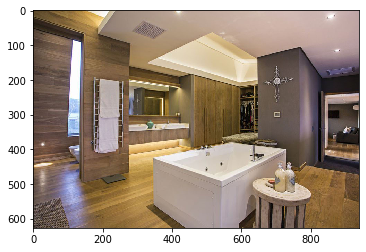

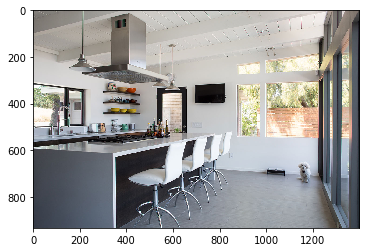

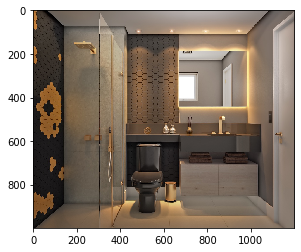

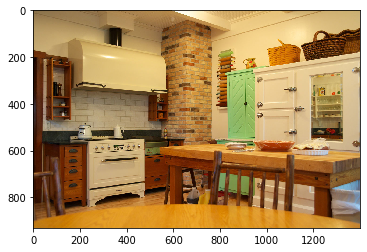

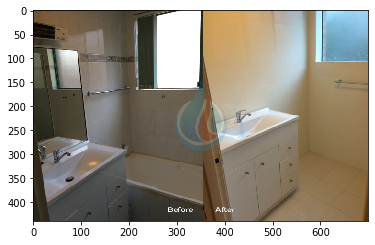

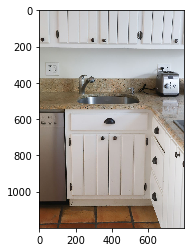

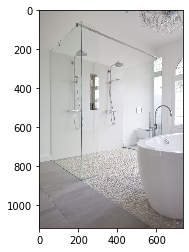

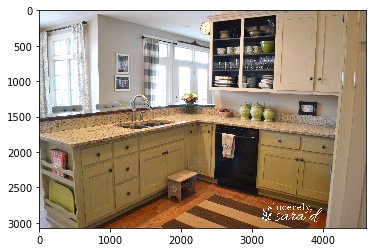

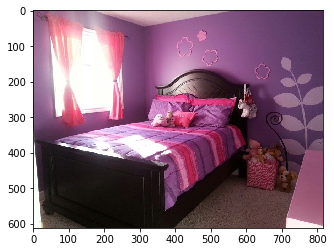

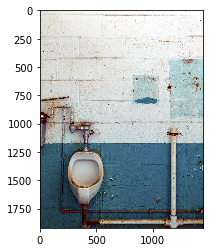

In [6]:
import matplotlib.image as mpimg
for ima in train_imgs[0:10]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

Image preprocess

In [6]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(2271, 224, 224, 3)
<class 'numpy.ndarray'>
(330, 224, 224, 3)


Labeling the images 

In [7]:

train_y = read_and_process_images(train_imgs)
train_y = np.array(train_y)
le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)
test_y = read_and_process_images(test_imgs)
test_y = np.array(test_y)
le = LabelEncoder()

test_y = le.fit_transform(test_y)

test_y=to_categorical(test_y)

test_y=np.array(test_y)

print(test_y.shape)
print(test_y)

print(train_y.shape)

(330, 6)
[[0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
(2271, 6)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.30, random_state=42)
print(len(X_train))
print(X_train.shape)

1589
(1589, 224, 224, 3)


In [ ]:
del train_imgs
del train_y
del train_img


In [20]:
from keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator (rotation_range=0.2,
                                     width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rotation_range=0.2,
                                     width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)


In [10]:
gc.collect()

82806

In [ ]:
batch_size = 64
train_generator = train_datagen.flow(X_train,Y_train, batch_size= batch_size)
val_generator = val_datagen.flow(X_valid,Y_valid,batch_size = batch_size)


In [ ]:
from datetime import datetime
from tensorflow.keras import callbacks
start = datetime.now()
setup_to_transfer_learning(model, inception_v3_model)
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, Y_train, epochs=40, batch_size=32,validation_data=(X_valid,Y_valid),callbacks=[es_callback])
#history = model.fit_generator(train_generator,
 #                             steps_per_epoch = ntrain // batch_size,
  #                            epochs =64, 
   #                           validation_data = val_generator,
    #                          validation_steps = nval // batch_size,callbacks=[es_callback])


end = datetime.now()
print('Traning the Fine Tune model:', (end - start))

In [ ]:
from datetime import datetime
from tensorflow.keras import callbacks
start = datetime.now()
setup_to_fine_tune(model, inception_v3_model)
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, Y_train, epochs=40, batch_size=16,validation_data=(X_valid,Y_valid),callbacks=[es_callback])
#history = model.fit_generator(train_generator,
 #                             steps_per_epoch = ntrain // batch_size,
  #                            epochs =64, 
   #                           validation_data = val_generator,
    #                          validation_steps = nval // batch_size,callbacks=[es_callback])


end = datetime.now()
print('Traning the Fine Tune model:', (end - start))

In [ ]:
from datetime import datetime
from tensorflow.keras import callbacks
start = datetime.now()
setup_to_fine_tune1(model, inception_v3_model)
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=0)
history = model.fit(X_train, Y_train, epochs=10, batch_size=16,validation_data=(X_valid,Y_valid),callbacks=[es_callback])
#history = model.fit_generator(train_generator,
 #                             steps_per_epoch = ntrain // batch_size,
  #                            epochs =64, 
   #                           validation_data = val_generator,
    #                          validation_steps = nval // batch_size,callbacks=[es_callback])


end = datetime.now()
print('Traning the Fine Tune model:', (end - start))

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()

In [17]:
score = model.evaluate(test_img, test_y, verbose=0)
print(score)
pred_y=model.predict(test_img)
print(test_y.shape)
print(pred_y.shape)

Y_pred =[]
for i in range(length_test):
    idx = np.argmax(pred_y, axis=1)


Y_pred = idx
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][0] > 0.5:
        Y_test.append(0)
    elif test_y[i][1] > 0.5:
        Y_test.append(1)
    elif test_y[i][2] > 0.5:
        Y_test.append(2)
    elif test_y[i][3] > 0.5:
        Y_test.append(3) 
    elif test_y[i][4] > 0.5:
        Y_test.append(4) 
    else:
        Y_test.append(5) 
    i +=1 
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)
accuracy = accuracy_score(Y_test,Y_pred)
print(accuracy)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)


[1.2779173692067465, 0.7212121212121212]
(330, 6)
(330, 6)
(330,)
<class 'numpy.ndarray'>
[5 1 3 3 4 0 2 1 0 0 5 0 3 4 0 5 2 5 4 5 3 0 0 2 5 0 0 1 1 0 5 4 0 5 0 3 4
 0 4 4 0 5 0 2 5 3 4 4 0 4 4 3 5 0 1 5 3 0 1 5 4 1 4 5 2 0 4 5 2 0 2 1 0 5
 4 3 4 2 5 4 0 0 4 0 4 5 5 3 5 0 3 4 0 0 2 1 0 5 4 3 5 0 0 3 2 5 4 3 2 3 1
 1 1 5 0 0 3 3 0 0 2 0 0 2 2 4 0 1 0 1 0 4 2 0 5 4 0 4 1 4 5 1 4 2 1 4 3 0
 5 5 1 2 3 0 1 4 1 4 1 5 2 1 5 4 3 1 4 4 1 1 5 3 4 1 1 2 5 4 4 0 1 5 4 4 1
 0 2 0 4 1 4 4 4 4 1 0 0 3 0 4 0 5 5 0 3 5 1 1 0 4 2 4 4 4 3 4 0 0 1 1 4 1
 2 0 5 0 1 5 1 4 5 2 3 4 4 2 3 2 3 0 1 2 2 5 5 0 5 2 5 0 4 1 1 4 2 4 1 5 4
 4 1 3 1 4 3 4 0 4 4 2 0 0 4 2 3 1 4 0 1 1 0 2 4 1 5 4 2 0 5 3 0 0 5 0 4 3
 1 4 4 0 0 0 5 4 0 5 0 4 1 4 0 3 0 5 0 0 0 1 1 5 0 0 5 4 5 5 1 0 5 5]
<class 'list'>
(330,)
<class 'numpy.ndarray'>
[4 1 3 1 4 0 2 1 2 0 5 0 3 2 0 5 2 5 5 1 3 1 0 3 5 0 0 1 1 0 5 4 3 3 0 3 4
 0 2 3 0 5 0 2 4 3 4 4 0 4 2 3 5 4 1 5 3 5 2 5 4 3 5 5 2 0 4 5 2 1 2 1 0 0
 4 3 2 2 5 4 0 4 2 0 4 5 3 3 5 2 3 4 0 3 2 1

array([[52,  3,  2,  0,  0,  3],
       [10, 45,  0,  1,  0,  4],
       [ 8,  1, 26,  4, 10,  1],
       [ 3,  2,  5, 28,  4,  8],
       [ 5,  0,  0,  0, 51,  4],
       [ 3,  2,  0,  0,  9, 36]])

Result one: 0.63, batch_size = 16

Result one:0.65, batch_size =32

batchsize =32, epoch = 4,  accuray = 0.6939

batchsize = 16, epoch =3, accuray = 0.745

# Data 2

In [5]:
train_dir = 'trainpreview'
train_imgs = ['trainpreview/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'test1'
test_imgs = ['test1/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test = len(test_imgs)

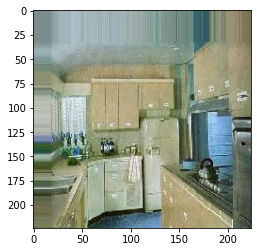

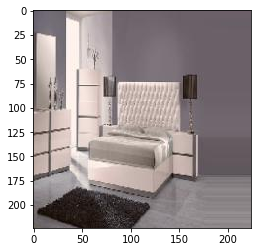

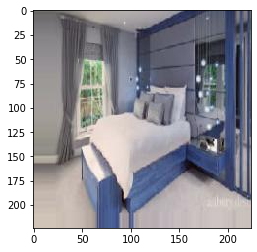

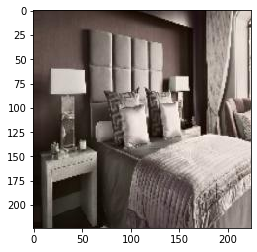

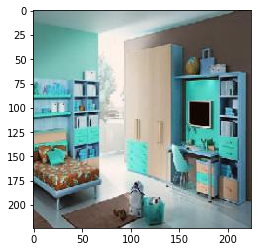

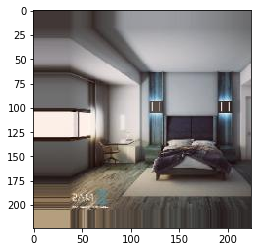

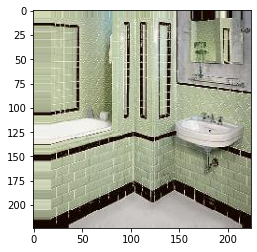

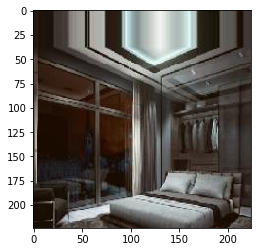

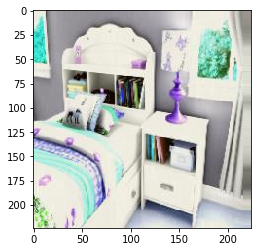

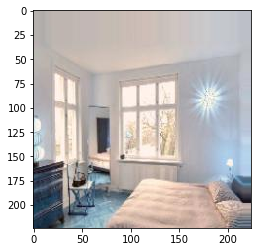

In [8]:
import matplotlib.image as mpimg
for ima in train_imgs[0:10]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [6]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)

test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(9076, 224, 224, 3)
<class 'numpy.ndarray'>
(330, 224, 224, 3)


In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
train_y = read_and_process_images(train_imgs)
train_y = np.array(train_y)
le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)
test_y = read_and_process_images(test_imgs)
test_y = np.array(test_y)
le = LabelEncoder()

test_y = le.fit_transform(test_y)

test_y=to_categorical(test_y)

test_y=np.array(test_y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.2, shuffle=True,random_state=42)


In [12]:
del train_imgs 
del test_imgs 
del train_y
del train_img
gc.collect()

133306

In [ ]:
from datetime import datetime
start = datetime.now()
setup_to_fine_tune(model, inception_v3_model)

es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=0)
history = model.fit(X_train, Y_train, epochs=10, batch_size=16,validation_data=(X_valid,Y_valid),callbacks=[es_callback])

#history = model.fit(X_train, Y_train, epochs=20, batch_size=128,validation_data=(X_valid,Y_valid))

#model.save('../data/models/17_flowers_iv3_transfer_learning_model.h5')
end = datetime.now()
print('Traning the Fine Tune model:', (end - start))

In [ ]:
batch_size = 32
from datetime import datetime
start = datetime.now()
setup_to_transfer_learning(model, inception_v3_model)

es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train, epochs=40, batch_size=32,validation_data=(X_valid,Y_valid),callbacks=[es_callback])
#history = model.fit(X_train, Y_train, epochs=40, batch_size=32,validation_data=(X_valid,Y_valid))

end = datetime.now()
print('Traning the Transfer Learning total spend:', (end - start))

In [ ]:
from datetime import datetime
start = datetime.now()
setup_to_fine_tune1(model, inception_v3_model)

es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)#
history = model.fit(X_train, Y_train, epochs=20, batch_size=16,validation_data=(X_valid,Y_valid),callbacks=[es_callback])

#history = model.fit(X_train, Y_train, epochs=20, batch_size=16,validation_data=(X_valid,Y_valid))

#model.save('../data/models/17_flowers_iv3_transfer_learning_model.h5')
end = datetime.now()
print('Traning the Fine Tune model:', (end - start))

In [ ]:
score = model.evaluate(test_img, test_y, verbose=0)
print(score)


pred_y=model.predict(test_img)
print(test_y.shape)
print(pred_y.shape)
Y_pred =[]
for i in range(length_test):
    idx = np.argmax(pred_y, axis=1)


Y_pred = idx
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)


Y_test =[]
for i in range(length_test):
    
    if test_y[i][0] > 0.5:
        Y_test.append(0)
    elif test_y[i][1] > 0.5:
        Y_test.append(1)
    elif test_y[i][2] > 0.5:
        Y_test.append(2)
    elif test_y[i][3] > 0.5:
        Y_test.append(3) 
    elif test_y[i][4] > 0.5:
        Y_test.append(4) 
    else:
        Y_test.append(5) 
    i +=1 
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)
accuracy = accuracy_score(Y_test,Y_pred)
print(accuracy)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)



fine1: epoch = 2, valid =0.1, batchsize = 37, result 0.754

fine1: epoch =3, valid =0.2. batchsize -32, result 0.776

Result one, batchsize =16, accuracy = 0.788, valid=0.1

Result one, batchsize =32, accuracy = 0.788,valid=0.05

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()

# Data 3

In [5]:
train_dir = 'trainpreview1'
train_imgs = ['trainpreview1/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'test1'
test_imgs = ['test1/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test = len(test_imgs)

In [6]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)

test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(18037, 224, 224, 3)
<class 'numpy.ndarray'>
(330, 224, 224, 3)


In [7]:
train_y = read_and_process_images(train_imgs)
train_y = np.array(train_y)
le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)
test_y = read_and_process_images(test_imgs)
test_y = np.array(test_y)
le = LabelEncoder()

test_y = le.fit_transform(test_y)

test_y=to_categorical(test_y)

test_y=np.array(test_y)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.025, random_state=42)


In [ ]:
del train_imgs
del train_img
del train_y
gc.collect()

In [ ]:
from datetime import datetime
start = datetime.now()
setup_to_fine_tune(model, inception_v3_model)
#history = model.fit(X_train, Y_train, epochs=10, batch_size=32,validation_data=(X_valid,Y_valid))
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(X_train, Y_train, epochs=10, batch_size=16,validation_data=(X_valid,Y_valid),callbacks=[es_callback])

#model.save('../data/models/17_flowers_iv3_transfer_learning_model.h5')
end = datetime.now()
print('Traning the Fine Tune model:', (end - start))

In [44]:
from datetime import datetime
start = datetime.now()
setup_to_fine_tune1(model, inception_v3_model)
#history = model.fit(X_train, Y_train, epochs=20, batch_size=16,validation_data=(X_valid,Y_valid))
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
history = model.fit(X_train, Y_train, epochs=10, batch_size=16,validation_data=(X_valid,Y_valid),callbacks=[es_callback])

#model.save('../data/models/17_flowers_iv3_transfer_learning_model.h5')
end = datetime.now()
print('Traning the Fine Tune model:', (end - start))

Train on 17586 samples, validate on 451 samples
Epoch 1/10
17586/17586 [==============================] - 252s 14ms/step - loss: 0.0212 - acc: 0.9943 - val_loss: 0.7610 - val_acc: 0.8581
Epoch 2/10
17586/17586 [==============================] - 168s 10ms/step - loss: 0.0202 - acc: 0.9952 - val_loss: 0.8814 - val_acc: 0.8359
Traning the Fine Tune model: 0:07:27.099145


In [ ]:

from datetime import datetime
start = datetime.now()
setup_to_transfer_learning(model, inception_v3_model)
#history = model.fit(X_train, Y_train, epochs=10, batch_size=32,validation_data=(X_valid,Y_valid))
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, Y_train, epochs=20, batch_size=16,validation_data=(X_valid,Y_valid),callbacks=[es_callback])

#model.save('../data/models/17_flowers_iv3_transfer_learning_model.h5')
end = datetime.now()
print('Traning the Fine Tune model:', (end - start))

In [ ]:

from datetime import datetime
start = datetime.now()
setup_to_transfer_learning(model, inception_v3_model)
#history = model.fit(X_train, Y_train, epochs=10, batch_size=32,validation_data=(X_valid,Y_valid))
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, Y_train, epochs=20, batch_size=16,validation_data=(X_valid,Y_valid),callbacks=[es_callback])

#model.save('../data/models/17_flowers_iv3_transfer_learning_model.h5')
end = datetime.now()
print('Traning the Fine Tune model:', (end - start))

In [ ]:

from datetime import datetime
start = datetime.now()
setup_to_transfer_learning(model, inception_v3_model)
#history = model.fit(X_train, Y_train, epochs=10, batch_size=32,validation_data=(X_valid,Y_valid))
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, Y_train, epochs=20, batch_size=16,validation_data=(X_valid,Y_valid),callbacks=[es_callback])

#model.save('../data/models/17_flowers_iv3_transfer_learning_model.h5')
end = datetime.now()
print('Traning the Fine Tune model:', (end - start))

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()

In [ ]:
score = model.evaluate(test_img, test_y, verbose=0)
print(score)
pred_y=model.predict(test_img)
print(test_y.shape)
print(pred_y.shape)
Y_pred =[]
for i in range(length_test):
    idx = np.argmax(pred_y, axis=1)


Y_pred = idx
print(Y_pred.shape)
print(type(Y_pred))

Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][0] > 0.5:
        Y_test.append(0)
    elif test_y[i][1] > 0.5:
        Y_test.append(1)
    elif test_y[i][2] > 0.5:
        Y_test.append(2)
    elif test_y[i][3] > 0.5:
        Y_test.append(3) 
    elif test_y[i][4] > 0.5:
        Y_test.append(4) 
    else:
        Y_test.append(5) 
    i +=1 
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)





Tune1: Result one: accruay = 0.73, batch_size = 32

Result one: accuracy = 0.785,batch_size =32